<h1>What is Selenium</h1>
Selenium is a popular Python library that provides a way to automate web browsers. It allows you to control a web browser through Python code and perform various actions on web pages, such as filling out forms, clicking buttons, and navigating between pages.

In [1]:
#importer les bibloithèques nécessaires
#Dans jumia tout le code est controlé par JavaScript
from selenium import webdriver
from time import sleep
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException

In [2]:
# create an instance of ChromeDriver
driver = webdriver.Chrome()
#Navigate to the url below
url = 'https://www.jumia.ma/catalog/?q=pc-portable&price=2956-36500#catalog-listing'
driver.get(url)
sleep(3)

<h1>Localizing the data </h1>

In [3]:
#find the articles
articles = driver.find_elements(By.XPATH,'//article[contains(@class, "prd _fb col c-prd") or contains(@class,"prd _fb _spn c-prd col")]')

#how many article do we have
len(articles)

52

<h1> Extracting data for an article </h1>

In [4]:
#Catching the last element
for article in articles :
    pass

In [5]:
#Getting the link of the article
article_link = article.find_element(By.TAG_NAME,'a').get_attribute('href')
print("The link to the article is", article_link)

The link to the article is https://www.jumia.ma/hp-pc-portable-hp-450-g3-6eme-gen-i7-ram-8g-256-ssd-remis-a-neuf-60053601.html


In [6]:
#Getting the name of the article 
description = article.find_element(By.CLASS_NAME,'name')
print ('the description of the pc: ' + description.text)

the description of the pc: Hp PC PORTABLE HP 450 G3 6EME GEN-I7-RAM 8G-256 SSD-REMIS A NEUF


In [7]:
#Getting the price of the product
price = article.find_element(By.CLASS_NAME,'prc')
print('The price of the pc: ' + price.text)

The price of the pc: 3,999.00 Dhs


In [8]:
#Getting the old price of the product
old_price = article.find_element(By.CLASS_NAME,'old')
print('The old price of the pc: ' + old_price.text)

The old price of the pc: 4,899.00 Dhs


In [9]:
#Getting the discount
discount = article.find_element(By.XPATH,'.//div[@class="bdg _dsct _sm"]')
print ('the discount is: ' + discount.text)

the discount is: 18%


In [10]:
#Getting the rating. Here, if the rating does not exist we give to the rating variable None
try:
    rating = article.find_element(By.XPATH,'.//div[@class="stars _s"]')
except NoSuchElementException:
    rating = None
print('The rating given to this pc is: ',rating)

The rating given to this pc is:  None


In [11]:
#Getting the image link 
src = article.find_element(By.XPATH,'.//img[@class="img"]').get_attribute("src")
print('The link of the image is: ' + src)

The link of the image is: https://ma.jumia.is/unsafe/fit-in/300x300/filters:fill(white)/product/10/635006/1.jpg?6766


<h1> Downloading an image </h1>

In [134]:
#Defining a function that downloads an image
# def get_img(url_img,id):
#     r = requests.get(url_img)
#     if r.status_code == 200:
#         img_container="image_"+str(id)+".png"
#         with open('images/img_container', 'wb') as f:
#             f.write(r.content)

<h1>Saving data in csv format </h1>

In [12]:
import csv
with open ('data_jumia_selenium.csv','w', encoding ='UTF-8') as output:
    writer = csv.writer(output,lineterminator='\n')
    writer.writerow(['Decription','Price','Old_price','Discount','Rating','Link','Image link' ])
    for i in range (0,len(articles)):
        article = articles[i]
        description = article.find_element(By.CLASS_NAME,'name').text
        price = article.find_element(By.CLASS_NAME,'prc').text
        try:
            old_price = article.find_element(By.CLASS_NAME,'old').text
        except NoSuchElementException:
            old_price = None
        try:
            discount = article.find_element(By.XPATH,'.//div[@class="bdg _dsct _sm"]').text
        except NoSuchElementException:
            discount = None
        try:
            rating = article.find_element(By.XPATH,'.//div[@class="stars _s"]').text
        except NoSuchElementException:
            rating = None
        link = article.find_element(By.TAG_NAME,'a').get_attribute('href')
        image_src = article.find_element(By.XPATH,'.//img[@class="img"]').get_attribute("src")
        writer.writerow([description,price,old_price,discount,rating,link,image_src])

# Data Cleaning

In [136]:
#Installing necessary libraries
# !pip install pandas
# !pip install missingno
# !pip install datetime

In [2]:
#Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import missingno as msno
import datetime as dt


In [4]:
#Transforming our data into a pandas database
articles = pd.read_csv('data_jumia_selenium.csv')
articles

,Decription,Price,Old_price,Discount,Rating,Link,Image link
0,Hp PC PORTABLE Elitebook CORE i5 6eme RAM 8Go ...,"2,999.00 Dhs","5,400.00 Dhs",44%,5 out of 5,https://www.jumia.ma/hp-pc-portable-elitebook-...,https://ma.jumia.is/unsafe/fit-in/300x300/filt...
1,Hp EliteBook 830 G9-i7 1255u-16GB-512G SSD-Win...,"16,800.00 Dhs","17,500.00 Dhs",4%,NaN,https://www.jumia.ma/hp-elitebook-830-g9-i7-12...,https://ma.jumia.is/unsafe/fit-in/300x300/filt...
2,Lenovo PC Performant-AMD R5-16GB-512G SSD-Win1...,"13,060.00 Dhs","14,000.00 Dhs",7%,NaN,https://www.jumia.ma/lenovo-pc-performant-amd-...,https://ma.jumia.is/unsafe/fit-in/300x300/filt...
3,Hp Pc Elitebook CORE i5 6eme RAM 16Go DDR4 - H...,"3,299.00 Dhs","6,500.00 Dhs",49%,NaN,https://www.jumia.ma/hp-pc-elitebook-core-i5-6...,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//..."
4,Lenovo PC portable-AMD R7 Pro 5850u-32GB-1TB S...,"18,100.00 Dhs","19,000.00 Dhs",5%,NaN,https://www.jumia.ma/lenovo-pc-portable-amd-r7...,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//..."
5,Lenovo PC Portable-AMD R5-16GB-512G SSD-Win10P...,"13,060.00 Dhs","14,000.00 Dhs",7%,NaN,https://www.jumia.ma/lenovo-pc-portable-amd-r5...,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//..."
6,Lenovo PC performant-AMD R7 Pro 5850u-32GB-1TB...,"18,100.00 Dhs","19,000.00 Dhs",5%,NaN,https://www.jumia.ma/lenovo-pc-performant-amd-...,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//..."
7,DELL Latitude 5520-i7 1165G7-RAM 16GB-512G SSD...,"15,410.00 Dhs","16,600.00 Dhs",7%,NaN,https://www.jumia.ma/dell-latitude-5520-i7-116...,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//..."
8,Acer PC PORTABLE Predator Helios 300 Gamer i7-...,"16,200.00 Dhs",NaN,NaN,NaN,https://www.jumia.ma/pc-portable-predator-heli...,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//..."
9,Hp Ordinateur EliteBook CORE i5-6eme RAM 32Go ...,"3,999.00 Dhs","5,400.00 Dhs",26%,NaN,https://www.jumia.ma/hp-ordinateur-elitebook-c...,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//..."


In [45]:
#Printing the head of the dataframe to visualise possible problems
articles.head()

,Decription,Price,Old_price,Discount,Rating,Link,Image link
0,Hp PC PORTABLE Elitebook CORE i5 6eme RAM 8Go ...,"2,999.00 Dhs","5,400.00 Dhs",44%,5 out of 5,https://www.jumia.ma/hp-pc-portable-elitebook-...,https://ma.jumia.is/unsafe/fit-in/300x300/filt...
1,Hp EliteBook 830 G9-i7 1255u-16GB-512G SSD-Win...,"16,800.00 Dhs","17,500.00 Dhs",4%,NaN,https://www.jumia.ma/hp-elitebook-830-g9-i7-12...,https://ma.jumia.is/unsafe/fit-in/300x300/filt...
2,Lenovo PC Performant-AMD R5-16GB-512G SSD-Win1...,"13,060.00 Dhs","14,000.00 Dhs",7%,NaN,https://www.jumia.ma/lenovo-pc-performant-amd-...,https://ma.jumia.is/unsafe/fit-in/300x300/filt...
3,Hp Pc Elitebook CORE i5 6eme RAM 16Go DDR4 - H...,"3,299.00 Dhs","6,500.00 Dhs",49%,NaN,https://www.jumia.ma/hp-pc-elitebook-core-i5-6...,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//..."
4,Lenovo PC portable-AMD R7 Pro 5850u-32GB-1TB S...,"18,100.00 Dhs","19,000.00 Dhs",5%,NaN,https://www.jumia.ma/lenovo-pc-portable-amd-r7...,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//..."


By analyzing the header of our data, we identify some issues with:

- **Data Type:**
    - The price is a string.
    - The old price is a string.
    - The discount is stored as a string instead of a proportion.
- **Missing Values:**
    - Many PCs are not rated.
    - Many image links are incorrect.
- **Text:**
    - The names of PCs are not clearly specified in the description column.
    

In [46]:
# Printing the columns' types
articles.dtypes

Decription    object
Price         object
Old_price     object
Discount      object
Rating        object
Link          object
Image link    object
dtype: object

By printing the data types, we observe that the `price` should be converted to floats, as well as the `Discount` and `Rating`.

In [47]:
#This command provides us with:
#The number of rows and columns in the DataFrame.
#The names of the columns and their data types.
#The number of non-null values in each column.
#The amount of memory used by the DataFrame.
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Decription  52 non-null     object
 1   Price       52 non-null     object
 2   Old_price   49 non-null     object
 3   Discount    49 non-null     object
 4   Rating      6 non-null      object
 5   Link        52 non-null     object
 6   Image link  52 non-null     object
dtypes: object(7)
memory usage: 3.0+ KB


Printing the information confirms that when there is no `Old price`, there is no `Discount`, and there are many unrated PCs.

In [48]:
#Printing the number of missing values in each column
articles.isna().sum()

Decription     0
Price          0
Old_price      3
Discount       3
Rating        46
Link           0
Image link     0
dtype: int64

We have only 5 missing values for the `Discount`, which indicates the frequent use of marketing techniques.

In [49]:
#For non-numeric data, the describe() method generates the following statistics for each column:
#count: the number of non-null values in the column.
#unique: the number of unique values in the column.
#top: the most frequent value in the column.
#freq: the frequency of the most frequent value in the column.
articles.describe()

,Decription,Price,Old_price,Discount,Rating,Link,Image link
count,52,52,49,49,6,52,52
unique,49,34,29,24,5,52,7
top,Lenovo PC portable-AMD R7 Pro 5850u-32GB-1TB S...,"18,100.00 Dhs","19,000.00 Dhs",5%,5 out of 5,https://www.jumia.ma/hp-pc-portable-elitebook-...,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//..."
freq,2,5,8,7,2,1,46


We observe that there are 40 image links that are similar.

# To-Do List
- **Task 1** : Split the description into two columns: type and description.
- **Task 2** :  Convert the data types of `Price` and `Old price` to float.
- **Task 3** :  Convert the `Discount` to a proportion (float).
- **Task 4** :  Handle missing data in the `Discount ` and `Old price` columns.
- **Task 5** :  Handle missing data in the `Rating` column by creating another column indicating whether a PC is rated or not.
- **Task 6** :  Categorize Pcs according to their prices

#  **Cleaning data**

###  **Task 1** : Split the description into two columns: type and description.

In [50]:
# DataFrame head
articles.head()

,Decription,Price,Old_price,Discount,Rating,Link,Image link
0,Hp PC PORTABLE Elitebook CORE i5 6eme RAM 8Go ...,"2,999.00 Dhs","5,400.00 Dhs",44%,5 out of 5,https://www.jumia.ma/hp-pc-portable-elitebook-...,https://ma.jumia.is/unsafe/fit-in/300x300/filt...
1,Hp EliteBook 830 G9-i7 1255u-16GB-512G SSD-Win...,"16,800.00 Dhs","17,500.00 Dhs",4%,NaN,https://www.jumia.ma/hp-elitebook-830-g9-i7-12...,https://ma.jumia.is/unsafe/fit-in/300x300/filt...
2,Lenovo PC Performant-AMD R5-16GB-512G SSD-Win1...,"13,060.00 Dhs","14,000.00 Dhs",7%,NaN,https://www.jumia.ma/lenovo-pc-performant-amd-...,https://ma.jumia.is/unsafe/fit-in/300x300/filt...
3,Hp Pc Elitebook CORE i5 6eme RAM 16Go DDR4 - H...,"3,299.00 Dhs","6,500.00 Dhs",49%,NaN,https://www.jumia.ma/hp-pc-elitebook-core-i5-6...,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//..."
4,Lenovo PC portable-AMD R7 Pro 5850u-32GB-1TB S...,"18,100.00 Dhs","19,000.00 Dhs",5%,NaN,https://www.jumia.ma/lenovo-pc-portable-amd-r7...,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//..."


In [51]:
# Split the description into two columns
description = articles['Decription'].str.split(n=1,expand = True)

In [52]:
#Assign the created columns to the columns Type and Name
articles['Type'] = description[0]
articles['Name'] = description[1]
# Print the head of the DataFrame
articles.head()

,Decription,Price,Old_price,Discount,Rating,Link,Image link,Type,Name
0,Hp PC PORTABLE Elitebook CORE i5 6eme RAM 8Go ...,"2,999.00 Dhs","5,400.00 Dhs",44%,5 out of 5,https://www.jumia.ma/hp-pc-portable-elitebook-...,https://ma.jumia.is/unsafe/fit-in/300x300/filt...,Hp,PC PORTABLE Elitebook CORE i5 6eme RAM 8Go DDR...
1,Hp EliteBook 830 G9-i7 1255u-16GB-512G SSD-Win...,"16,800.00 Dhs","17,500.00 Dhs",4%,NaN,https://www.jumia.ma/hp-elitebook-830-g9-i7-12...,https://ma.jumia.is/unsafe/fit-in/300x300/filt...,Hp,EliteBook 830 G9-i7 1255u-16GB-512G SSD-Win10P...
2,Lenovo PC Performant-AMD R5-16GB-512G SSD-Win1...,"13,060.00 Dhs","14,000.00 Dhs",7%,NaN,https://www.jumia.ma/lenovo-pc-performant-amd-...,https://ma.jumia.is/unsafe/fit-in/300x300/filt...,Lenovo,PC Performant-AMD R5-16GB-512G SSD-Win10Pro-Az...
3,Hp Pc Elitebook CORE i5 6eme RAM 16Go DDR4 - H...,"3,299.00 Dhs","6,500.00 Dhs",49%,NaN,https://www.jumia.ma/hp-pc-elitebook-core-i5-6...,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//...",Hp,Pc Elitebook CORE i5 6eme RAM 16Go DDR4 - HDD ...
4,Lenovo PC portable-AMD R7 Pro 5850u-32GB-1TB S...,"18,100.00 Dhs","19,000.00 Dhs",5%,NaN,https://www.jumia.ma/lenovo-pc-portable-amd-r7...,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//...",Lenovo,PC portable-AMD R7 Pro 5850u-32GB-1TB SSD-Win1...


In [53]:
#Delete the Description column
articles.drop('Decription',axis = 1,inplace = True)
#Print the DataFrame head
articles.head()

,Price,Old_price,Discount,Rating,Link,Image link,Type,Name
0,"2,999.00 Dhs","5,400.00 Dhs",44%,5 out of 5,https://www.jumia.ma/hp-pc-portable-elitebook-...,https://ma.jumia.is/unsafe/fit-in/300x300/filt...,Hp,PC PORTABLE Elitebook CORE i5 6eme RAM 8Go DDR...
1,"16,800.00 Dhs","17,500.00 Dhs",4%,NaN,https://www.jumia.ma/hp-elitebook-830-g9-i7-12...,https://ma.jumia.is/unsafe/fit-in/300x300/filt...,Hp,EliteBook 830 G9-i7 1255u-16GB-512G SSD-Win10P...
2,"13,060.00 Dhs","14,000.00 Dhs",7%,NaN,https://www.jumia.ma/lenovo-pc-performant-amd-...,https://ma.jumia.is/unsafe/fit-in/300x300/filt...,Lenovo,PC Performant-AMD R5-16GB-512G SSD-Win10Pro-Az...
3,"3,299.00 Dhs","6,500.00 Dhs",49%,NaN,https://www.jumia.ma/hp-pc-elitebook-core-i5-6...,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//...",Hp,Pc Elitebook CORE i5 6eme RAM 16Go DDR4 - HDD ...
4,"18,100.00 Dhs","19,000.00 Dhs",5%,NaN,https://www.jumia.ma/lenovo-pc-portable-amd-r7...,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//...",Lenovo,PC portable-AMD R7 Pro 5850u-32GB-1TB SSD-Win1...


In [54]:
# Change the columns order
articles = articles.reindex(columns=['Type','Name','Price','Old_price', 'Discount','Rating','Link','Image link'])
articles

,Type,Name,Price,Old_price,Discount,Rating,Link,Image link
0,Hp,PC PORTABLE Elitebook CORE i5 6eme RAM 8Go DDR...,"2,999.00 Dhs","5,400.00 Dhs",44%,5 out of 5,https://www.jumia.ma/hp-pc-portable-elitebook-...,https://ma.jumia.is/unsafe/fit-in/300x300/filt...
1,Hp,EliteBook 830 G9-i7 1255u-16GB-512G SSD-Win10P...,"16,800.00 Dhs","17,500.00 Dhs",4%,NaN,https://www.jumia.ma/hp-elitebook-830-g9-i7-12...,https://ma.jumia.is/unsafe/fit-in/300x300/filt...
2,Lenovo,PC Performant-AMD R5-16GB-512G SSD-Win10Pro-Az...,"13,060.00 Dhs","14,000.00 Dhs",7%,NaN,https://www.jumia.ma/lenovo-pc-performant-amd-...,https://ma.jumia.is/unsafe/fit-in/300x300/filt...
3,Hp,Pc Elitebook CORE i5 6eme RAM 16Go DDR4 - HDD ...,"3,299.00 Dhs","6,500.00 Dhs",49%,NaN,https://www.jumia.ma/hp-pc-elitebook-core-i5-6...,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//..."
4,Lenovo,PC portable-AMD R7 Pro 5850u-32GB-1TB SSD-Win1...,"18,100.00 Dhs","19,000.00 Dhs",5%,NaN,https://www.jumia.ma/lenovo-pc-portable-amd-r7...,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//..."
5,Lenovo,PC Portable-AMD R5-16GB-512G SSD-Win10Pro-Azer...,"13,060.00 Dhs","14,000.00 Dhs",7%,NaN,https://www.jumia.ma/lenovo-pc-portable-amd-r5...,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//..."
6,Lenovo,PC performant-AMD R7 Pro 5850u-32GB-1TB SSD-Wi...,"18,100.00 Dhs","19,000.00 Dhs",5%,NaN,https://www.jumia.ma/lenovo-pc-performant-amd-...,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//..."
7,DELL,Latitude 5520-i7 1165G7-RAM 16GB-512G SSD-Win ...,"15,410.00 Dhs","16,600.00 Dhs",7%,NaN,https://www.jumia.ma/dell-latitude-5520-i7-116...,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//..."
8,Acer,PC PORTABLE Predator Helios 300 Gamer i7-11800...,"16,200.00 Dhs",NaN,NaN,NaN,https://www.jumia.ma/pc-portable-predator-heli...,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//..."
9,Hp,Ordinateur EliteBook CORE i5-6eme RAM 32Go DDR...,"3,999.00 Dhs","5,400.00 Dhs",26%,NaN,https://www.jumia.ma/hp-ordinateur-elitebook-c...,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//..."


###  **Task 2** :  Convert the data types of `Price` and `Old price` to float.

In [55]:
articles.head()

,Type,Name,Price,Old_price,Discount,Rating,Link,Image link
0,Hp,PC PORTABLE Elitebook CORE i5 6eme RAM 8Go DDR...,"2,999.00 Dhs","5,400.00 Dhs",44%,5 out of 5,https://www.jumia.ma/hp-pc-portable-elitebook-...,https://ma.jumia.is/unsafe/fit-in/300x300/filt...
1,Hp,EliteBook 830 G9-i7 1255u-16GB-512G SSD-Win10P...,"16,800.00 Dhs","17,500.00 Dhs",4%,NaN,https://www.jumia.ma/hp-elitebook-830-g9-i7-12...,https://ma.jumia.is/unsafe/fit-in/300x300/filt...
2,Lenovo,PC Performant-AMD R5-16GB-512G SSD-Win10Pro-Az...,"13,060.00 Dhs","14,000.00 Dhs",7%,NaN,https://www.jumia.ma/lenovo-pc-performant-amd-...,https://ma.jumia.is/unsafe/fit-in/300x300/filt...
3,Hp,Pc Elitebook CORE i5 6eme RAM 16Go DDR4 - HDD ...,"3,299.00 Dhs","6,500.00 Dhs",49%,NaN,https://www.jumia.ma/hp-pc-elitebook-core-i5-6...,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//..."
4,Lenovo,PC portable-AMD R7 Pro 5850u-32GB-1TB SSD-Win1...,"18,100.00 Dhs","19,000.00 Dhs",5%,NaN,https://www.jumia.ma/lenovo-pc-portable-amd-r7...,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//..."


In [56]:
# Remove 'Dhs' and ',' from prices
articles['Price'] = articles['Price'].str.strip('Dhs').str.replace(',','')
articles['Old_price'] = articles['Old_price'].str.strip('Dhs').str.replace(',','')
#Print the head of the concerned columns
articles.iloc[0:4,[2,3]]

,Price,Old_price
0,2999.00,5400.00
1,16800.00,17500.00
2,13060.00,14000.00
3,3299.00,6500.00


In [57]:
#Columns types
articles.dtypes

Type          object
Name          object
Price         object
Old_price     object
Discount      object
Rating        object
Link          object
Image link    object
dtype: object

In [58]:
#Converte the types of prices to floats
articles['Price'] = articles['Price'].astype('float')
articles['Old_price'] = articles['Old_price'].astype('float')
#Print the columns types
articles.dtypes

Type           object
Name           object
Price         float64
Old_price     float64
Discount       object
Rating         object
Link           object
Image link     object
dtype: object

C:\Users\Jamila Afer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jamila Afer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


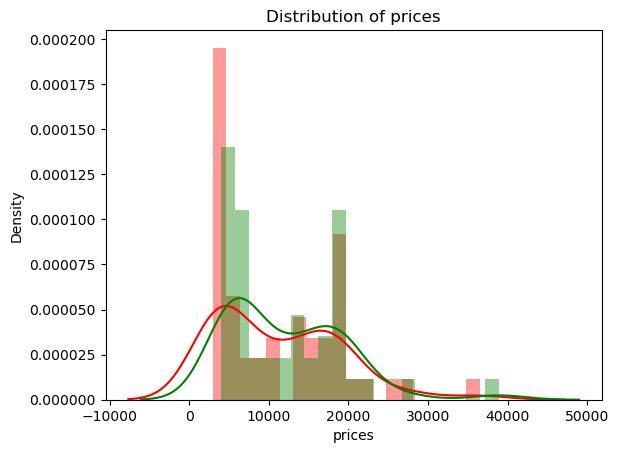

In [59]:
# Visualize the distribution of prices and old prices.
sns.distplot(articles['Price'],hist=True,bins= 20,color='r')
sns.distplot(articles['Old_price'],hist=True,bins= 20,color='g')
plt.xlabel('prices')
plt.title('Distribution of prices')
plt.show()

In [60]:
#Print the max values of the prices
print('The mean price is:        ', articles['Price'].mean())
print('The highest price is:     ', articles['Price'].max())


le prix moyen est:         11179.038461538461
Le prix le plus élevé est:    36500.0


## **Task 3** :  Convert the `Discount` to a proportion (float).

In [61]:
articles.head()

,Type,Name,Price,Old_price,Discount,Rating,Link,Image link
0,Hp,PC PORTABLE Elitebook CORE i5 6eme RAM 8Go DDR...,2999.0,5400.0,44%,5 out of 5,https://www.jumia.ma/hp-pc-portable-elitebook-...,https://ma.jumia.is/unsafe/fit-in/300x300/filt...
1,Hp,EliteBook 830 G9-i7 1255u-16GB-512G SSD-Win10P...,16800.0,17500.0,4%,NaN,https://www.jumia.ma/hp-elitebook-830-g9-i7-12...,https://ma.jumia.is/unsafe/fit-in/300x300/filt...
2,Lenovo,PC Performant-AMD R5-16GB-512G SSD-Win10Pro-Az...,13060.0,14000.0,7%,NaN,https://www.jumia.ma/lenovo-pc-performant-amd-...,https://ma.jumia.is/unsafe/fit-in/300x300/filt...
3,Hp,Pc Elitebook CORE i5 6eme RAM 16Go DDR4 - HDD ...,3299.0,6500.0,49%,NaN,https://www.jumia.ma/hp-pc-elitebook-core-i5-6...,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//..."
4,Lenovo,PC portable-AMD R7 Pro 5850u-32GB-1TB SSD-Win1...,18100.0,19000.0,5%,NaN,https://www.jumia.ma/lenovo-pc-portable-amd-r7...,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//..."


In [62]:
#Remove the '%' from Discount column
articles['Discount'] = articles['Discount'].str.strip('%')
#Verify if the changes are well done
articles['Discount'].head()

0    44
1     4
2     7
3    49
4     5
Name: Discount, dtype: object

In [63]:
#Change the discount type to float
articles['Discount'] = articles['Discount'].astype('float')
#Print the type of the Discount column
articles['Discount'].dtype

dtype('float64')

In [64]:
#Change the discount values to propotions
articles['Discount'] = articles['Discount']/100
#Verify if the changes are well done
articles['Discount'].head()

0    0.44
1    0.04
2    0.07
3    0.49
4    0.05
Name: Discount, dtype: float64

## Dealing with missing data

<AxesSubplot:>

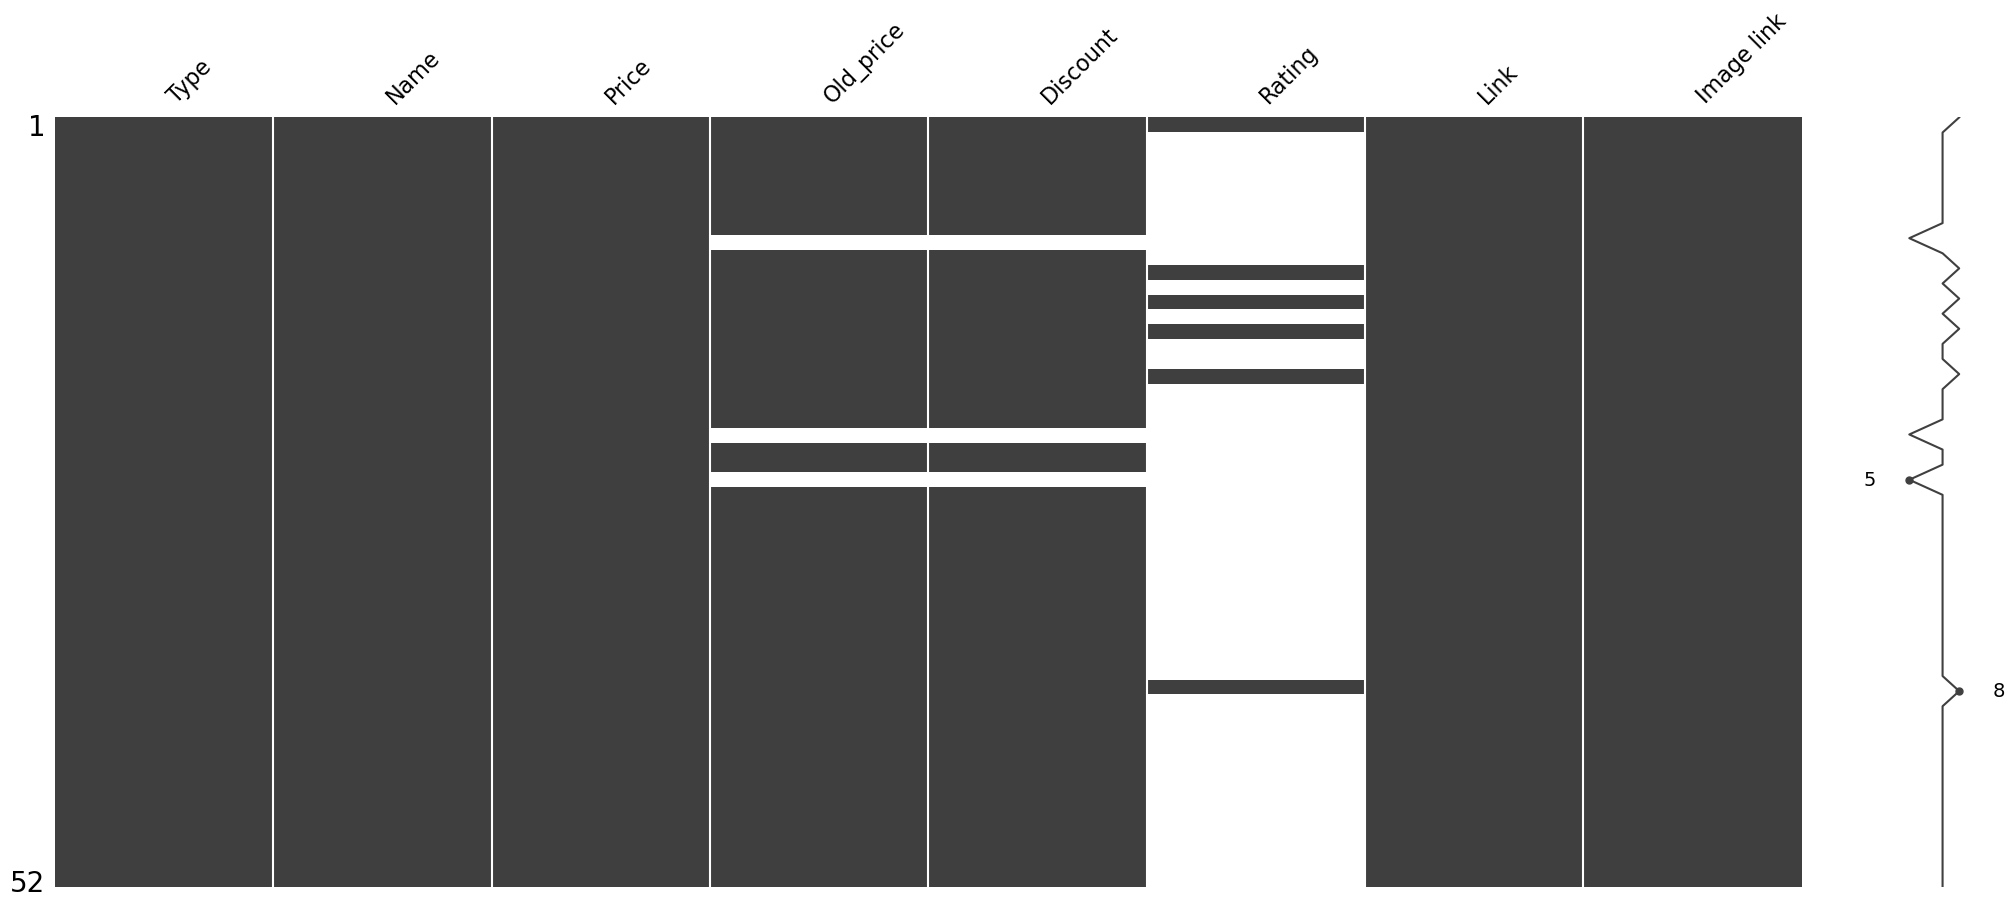

In [65]:
# Visualise the missing values
msno.matrix(articles)

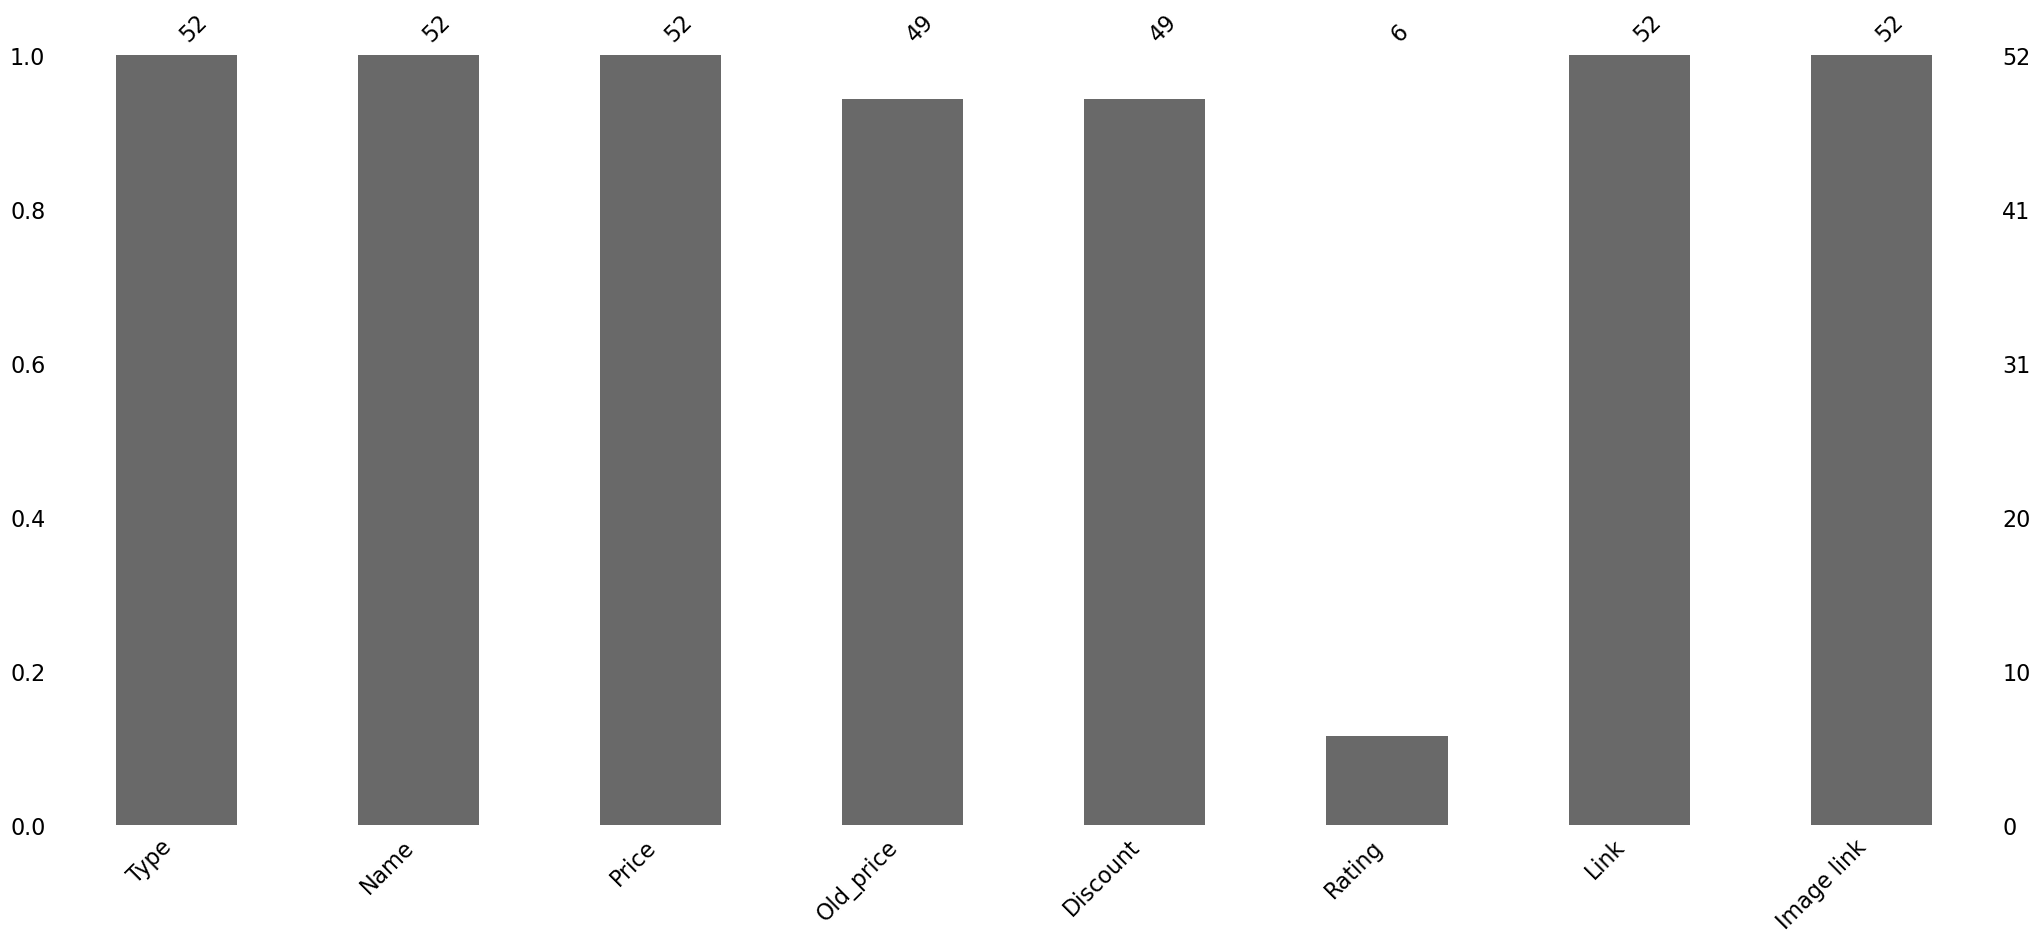

In [66]:
# Barplot of missing values
msno.bar(articles)
plt.show()

The missing values are identical for `Old price` and `Discount`, i.e. when there is no discount there is no old price

### **Task 4** :  Handle missing data in the `Discount ` and `Old price` columns.

In [67]:
#When the Discount is NAN it means that there is no discount, so we replace the NAN by 0
articles = articles.fillna({'Discount' : 0})
#Display the Pcs whose discounts are 0 in the header of the DataFrame
articles.sort_values(by = 'Discount').head()


,Type,Name,Price,Old_price,Discount,Rating,Link,Image link
24,Asus,"F556 Ecran 15.6"" HD/ Intel Core i7-6500U/ Nvid...",5299.0,NaN,0.00,NaN,https://www.jumia.ma/asus-f556-ecran-15.6-hd-i...,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//..."
21,Hp,Zbook Power G8 Mobile Workstation-i7 11850H-64...,28000.0,NaN,0.00,NaN,https://www.jumia.ma/hp-zbook-power-g8-mobile-...,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//..."
8,Acer,PC PORTABLE Predator Helios 300 Gamer i7-11800...,16200.0,NaN,0.00,NaN,https://www.jumia.ma/pc-portable-predator-heli...,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//..."
32,Hp,EliteBook 840 G8-14p FHD-i7 1185G7-16GB-512G S...,16590.0,17000.0,0.02,NaN,https://www.jumia.ma/hp-elitebook-840-g8-14p-f...,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//..."
29,DELL,PC professionnel-i7 1165G7-RAM 32GB-1TB SSD-Wi...,18520.0,19000.0,0.03,NaN,https://www.jumia.ma/dell-pc-professionnel-i7-...,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//..."


In [68]:
#When there is no discount, the old price is the normal price.
articles = articles.fillna({'Old_price' : articles['Price']})
#Show changes
articles.sort_values(by = 'Discount').head()

,Type,Name,Price,Old_price,Discount,Rating,Link,Image link
24,Asus,"F556 Ecran 15.6"" HD/ Intel Core i7-6500U/ Nvid...",5299.0,5299.0,0.00,NaN,https://www.jumia.ma/asus-f556-ecran-15.6-hd-i...,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//..."
21,Hp,Zbook Power G8 Mobile Workstation-i7 11850H-64...,28000.0,28000.0,0.00,NaN,https://www.jumia.ma/hp-zbook-power-g8-mobile-...,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//..."
8,Acer,PC PORTABLE Predator Helios 300 Gamer i7-11800...,16200.0,16200.0,0.00,NaN,https://www.jumia.ma/pc-portable-predator-heli...,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//..."
32,Hp,EliteBook 840 G8-14p FHD-i7 1185G7-16GB-512G S...,16590.0,17000.0,0.02,NaN,https://www.jumia.ma/hp-elitebook-840-g8-14p-f...,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//..."
29,DELL,PC professionnel-i7 1165G7-RAM 32GB-1TB SSD-Wi...,18520.0,19000.0,0.03,NaN,https://www.jumia.ma/dell-pc-professionnel-i7-...,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//..."


In [69]:
#Check the disappearance of NAN for Discount and Old price
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Type        52 non-null     object 
 1   Name        52 non-null     object 
 2   Price       52 non-null     float64
 3   Old_price   52 non-null     float64
 4   Discount    52 non-null     float64
 5   Rating      6 non-null      object 
 6   Link        52 non-null     object 
 7   Image link  52 non-null     object 
dtypes: float64(3), object(5)
memory usage: 3.4+ KB


C:\Users\Jamila Afer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Jamila Afer\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


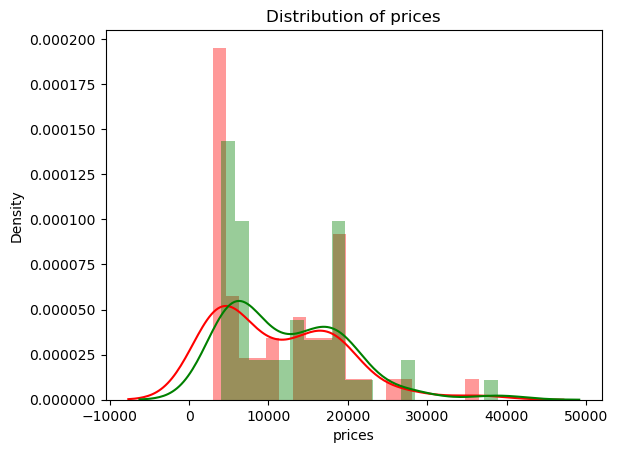

In [70]:
# Visualize the distribution of prices and old prices
sns.distplot(articles['Price'],hist=True,bins= 20,color='r')
sns.distplot(articles['Old_price'],hist=True,bins= 20,color='g')
plt.xlabel('prices')
plt.title('Distribution of prices')
plt.show()

## - **Task 5** :  Handle missing data in the `Rating` column 

As we cannot delete the lines for which the rating does not exist (many missing values: 42) and we cannot predict them, we create another column `is Rated` which contains 1 if the PC is rated and 0 Otherwise

In [71]:
# Create the column is Rated
isRated = np.where(articles['Rating'].isna() == True, 0, 1)
articles['is Rated'] = isRated
#DataFrame head
articles.head()

,Type,Name,Price,Old_price,Discount,Rating,Link,Image link,is Rated
0,Hp,PC PORTABLE Elitebook CORE i5 6eme RAM 8Go DDR...,2999.0,5400.0,0.44,5 out of 5,https://www.jumia.ma/hp-pc-portable-elitebook-...,https://ma.jumia.is/unsafe/fit-in/300x300/filt...,1
1,Hp,EliteBook 830 G9-i7 1255u-16GB-512G SSD-Win10P...,16800.0,17500.0,0.04,NaN,https://www.jumia.ma/hp-elitebook-830-g9-i7-12...,https://ma.jumia.is/unsafe/fit-in/300x300/filt...,0
2,Lenovo,PC Performant-AMD R5-16GB-512G SSD-Win10Pro-Az...,13060.0,14000.0,0.07,NaN,https://www.jumia.ma/lenovo-pc-performant-amd-...,https://ma.jumia.is/unsafe/fit-in/300x300/filt...,0
3,Hp,Pc Elitebook CORE i5 6eme RAM 16Go DDR4 - HDD ...,3299.0,6500.0,0.49,NaN,https://www.jumia.ma/hp-pc-elitebook-core-i5-6...,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//...",0
4,Lenovo,PC portable-AMD R7 Pro 5850u-32GB-1TB SSD-Win1...,18100.0,19000.0,0.05,NaN,https://www.jumia.ma/lenovo-pc-portable-amd-r7...,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//...",0


### **Task 6** :  Categorize Pcs according to their prices

In [72]:
#Added a new column in which we specify if the PC is affordable or expensive
categorie = np.where(articles['Price']>7000, 'Cher', 'Abordable')
articles['Categories'] = categorie
articles.head()

,Type,Name,Price,Old_price,Discount,Rating,Link,Image link,is Rated,Categories
0,Hp,PC PORTABLE Elitebook CORE i5 6eme RAM 8Go DDR...,2999.0,5400.0,0.44,5 out of 5,https://www.jumia.ma/hp-pc-portable-elitebook-...,https://ma.jumia.is/unsafe/fit-in/300x300/filt...,1,Cher
1,Hp,EliteBook 830 G9-i7 1255u-16GB-512G SSD-Win10P...,16800.0,17500.0,0.04,NaN,https://www.jumia.ma/hp-elitebook-830-g9-i7-12...,https://ma.jumia.is/unsafe/fit-in/300x300/filt...,0,Cher
2,Lenovo,PC Performant-AMD R5-16GB-512G SSD-Win10Pro-Az...,13060.0,14000.0,0.07,NaN,https://www.jumia.ma/lenovo-pc-performant-amd-...,https://ma.jumia.is/unsafe/fit-in/300x300/filt...,0,Cher
3,Hp,Pc Elitebook CORE i5 6eme RAM 16Go DDR4 - HDD ...,3299.0,6500.0,0.49,NaN,https://www.jumia.ma/hp-pc-elitebook-core-i5-6...,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//...",0,Cher
4,Lenovo,PC portable-AMD R7 Pro 5850u-32GB-1TB SSD-Win1...,18100.0,19000.0,0.05,NaN,https://www.jumia.ma/lenovo-pc-portable-amd-r7...,"data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP//...",0,Cher


In [73]:
#Conversion to 'category' type to facilitate frequency groupings and counts.
articles.Type = articles.Type.astype('category')

# Visualization

In [74]:
from matplotlib import pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

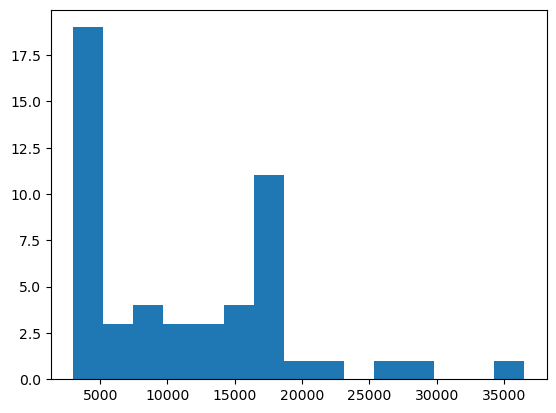

In [75]:
p=plt.hist(articles.Price, bins=15)

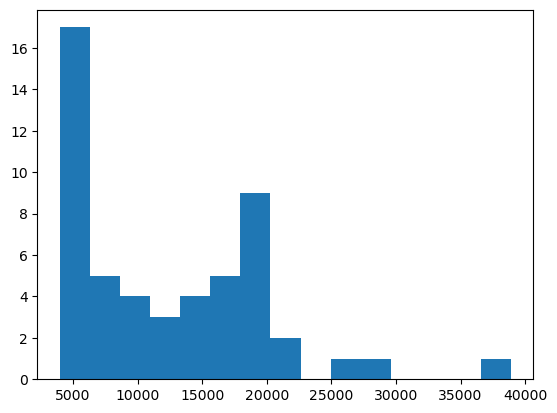

In [76]:
p=plt.hist(articles.Old_price, bins=15)

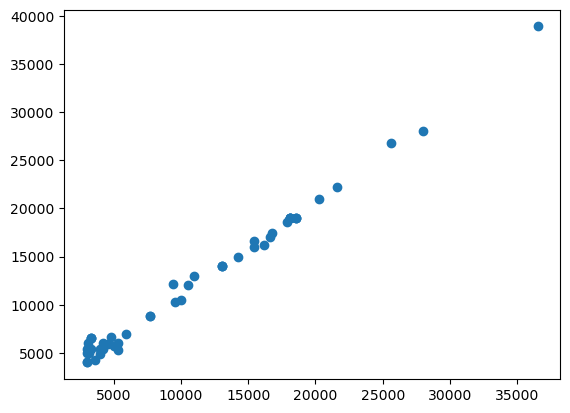

In [77]:
#create a scatter plot
plt.scatter(data=articles, x='Price', y='Old_price')

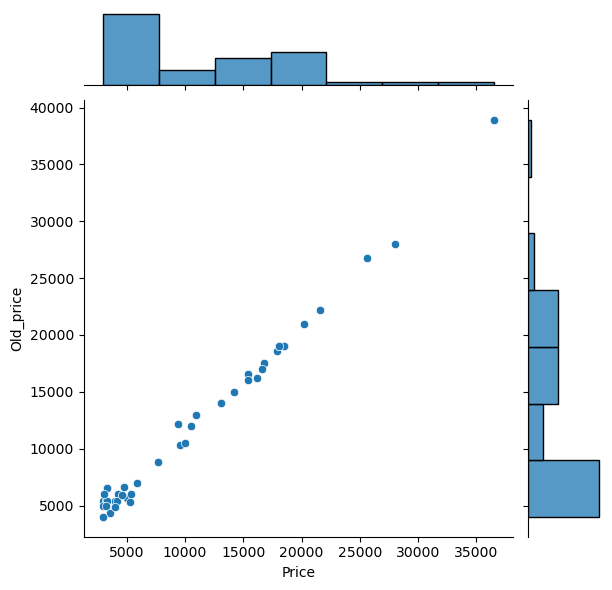

In [78]:
#create a join plot, combines both a density plot (distribution plot) for each axis and a scatter plot (scatter plot)
j = sns.jointplot(data=articles, x='Price', y='Old_price')

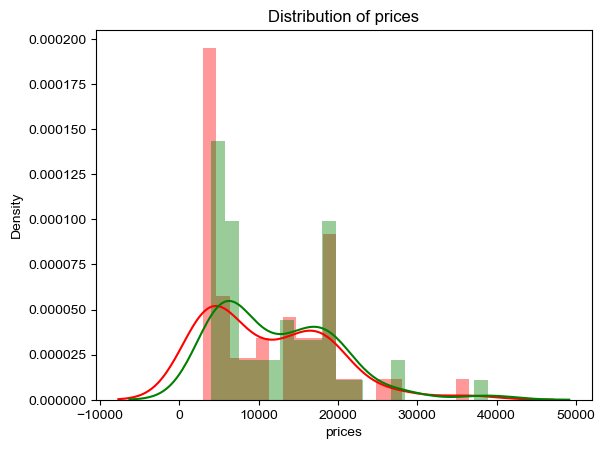

In [79]:
# Visualize the distribution of the Price and Old Price
sns.distplot(articles['Price'],hist=True,bins= 20,color='r')
sns.distplot(articles['Old_price'],hist=True,bins= 20,color='g')
plt.xlabel('prices')
plt.title('Distribution of prices')
sns.set_style ("whitegrid") #adding grid to the graph

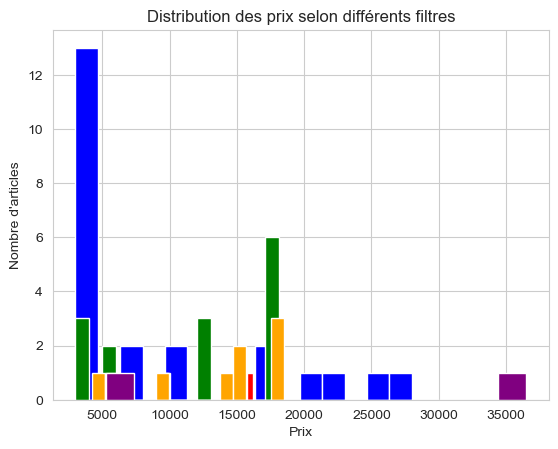

In [81]:
Filter1= articles.Type == 'Hp'
Filter2= articles.Type == 'Lenovo'
Filter3= articles.Type == 'Acer'
Filter4= articles.Type == 'DELL'
Filter5= articles.Type == 'Asus'

plt.hist(articles.Price[Filter1],bins=15, color="blue")
plt.hist(articles.Price[Filter2],bins=15, color="green")
plt.hist(articles.Price[Filter3],bins=15, color="red")
plt.hist(articles.Price[Filter4],bins=15, color="orange")
plt.hist(articles.Price[Filter5],bins=15, color="purple")
plt.title('Distribution des prix selon différents filtres')
plt.xlabel('Prix')
plt.ylabel('Nombre d\'articles')
plt.show()

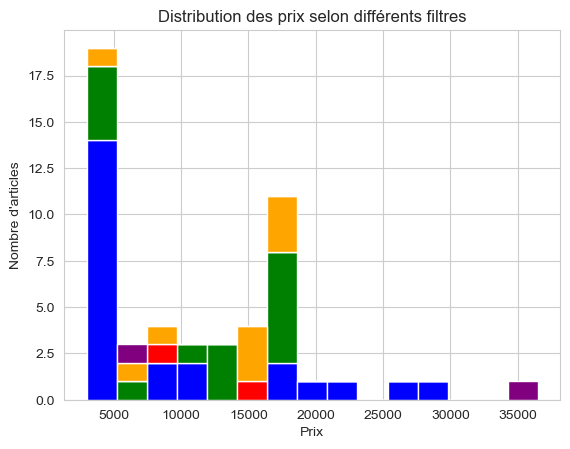

In [82]:
plt.hist([articles.Price[Filter1],\
          articles.Price[Filter2],\
          articles.Price[Filter3],\
          articles.Price[Filter4],\
          articles.Price[Filter5]],\
          bins=15,stacked=True,
          color=['blue', 'green', 'red', 'orange', 'purple'])
plt.title('Distribution des prix selon différents filtres')
plt.xlabel('Prix')
plt.ylabel('Nombre d\'articles')
plt.show()

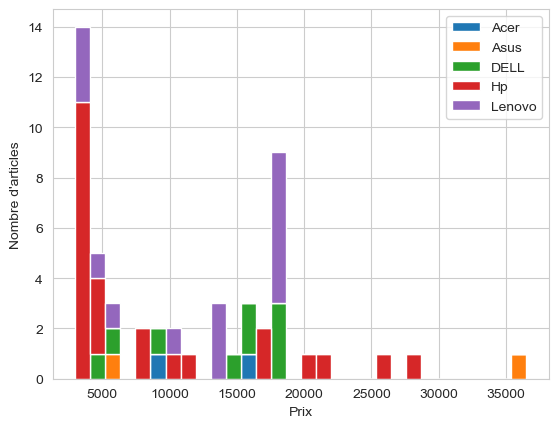

In [83]:
Types_List = articles.Type.cat.categories
List1 = list()
myLabels= list()
for gen in Types_List:
    List1.append(articles.Price[articles.Type == gen]) # we will add to list new genre each time
    myLabels.append(gen)
h=plt.hist(List1,bins=30,stacked=True,rwidth=1,label = myLabels)
plt.legend()
plt.xlabel('Prix')
plt.ylabel('Nombre d\'articles')
plt.show()

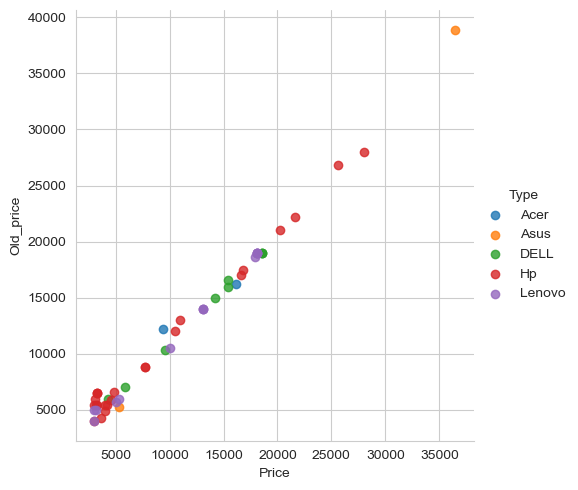

In [84]:
#afficher la relation entre les prix actuels et les prix anciens pour chaque genre de PC
#Show the relationship between the actual price and the old prices for each Pcs type 
vis1= sns.lmplot(data=articles , x="Price" ,y="Old_price", fit_reg=False ,hue="Type", aspect=1)